In [1]:
!date

Thu Jun 13 02:37:24 PDT 2019


In [1]:
import scanpy as sc
from scipy import sparse, io
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [2]:
c = sc.read_10x_mtx("/home/single_cell_analysis/cellranger_out/cellranger3_pbmc10k_v3_out/outs/filtered_feature_bc_matrix/")

In [3]:
k = sc.read_mtx("/home/single_cell_analysis/kallisto_out_single_bustools_dev/kallisto_pbmc10k_v3/genes.mtx")

In [4]:
print(c)
print(k)

View of AnnData object with n_obs × n_vars = 11692 × 33538 
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 1266268 × 33538 


In [6]:
k_bcs = pd.read_csv("/home/single_cell_analysis/kallisto_out_single_bustools_dev/kallisto_pbmc10k_v3/genes.barcodes.txt", header=None)
k_genes = pd.read_csv("/home/single_cell_analysis/kallisto_out_single_bustools_dev/kallisto_pbmc10k_v3/genes.genes.txt", header=None)

In [7]:
k.obs.index = k_bcs[0].values
k.var.index = k_genes[0].values

## Filter k by barcodes in c

In [8]:
c.obs.index = c.obs.index.str.slice(0, 16)

In [9]:
c.var.index = c.var["gene_ids"]

In [11]:
k = k[k.obs.index.isin(c.obs.index)]
print(k)

View of AnnData object with n_obs × n_vars = 11692 × 33538 


In [12]:
k = k[:,k.var.index.isin(c.var.index)]
print(k)

View of AnnData object with n_obs × n_vars = 11692 × 33538 


In [13]:
c = c[:,c.var.index.isin(k.var.index)]

In [14]:
print(c)
print(k)

View of AnnData object with n_obs × n_vars = 11692 × 33538 
    var: 'gene_ids', 'feature_types'
View of AnnData object with n_obs × n_vars = 11692 × 33538 


In [15]:
safe_c = c.copy()
safe_k = k.copy()

In [21]:
c = safe_c.copy()
k = safe_k.copy()

# Scanpy Analysis

In [16]:
c.var_names_make_unique()
c.obs_names_make_unique()
sc.pp.filter_cells(c, min_genes=0)
sc.pp.filter_cells(c, min_counts=0)
sc.pp.filter_genes(c, min_cells=0)

k.var_names_make_unique()
k.obs_names_make_unique()
sc.pp.filter_cells(k, min_genes=0)
sc.pp.filter_cells(k, min_counts=0)
sc.pp.filter_genes(k, min_cells=0)

saving figure to file ./figures/violincellranger_gene.pdf


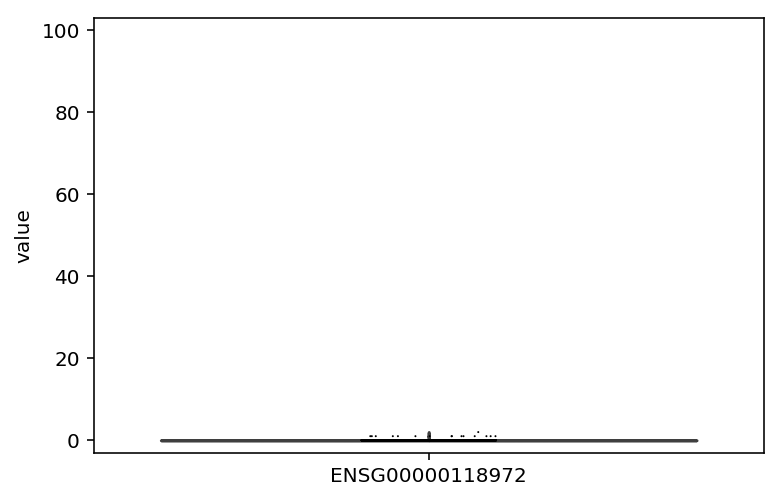

saving figure to file ./figures/violinkallisto_regular_gene.pdf


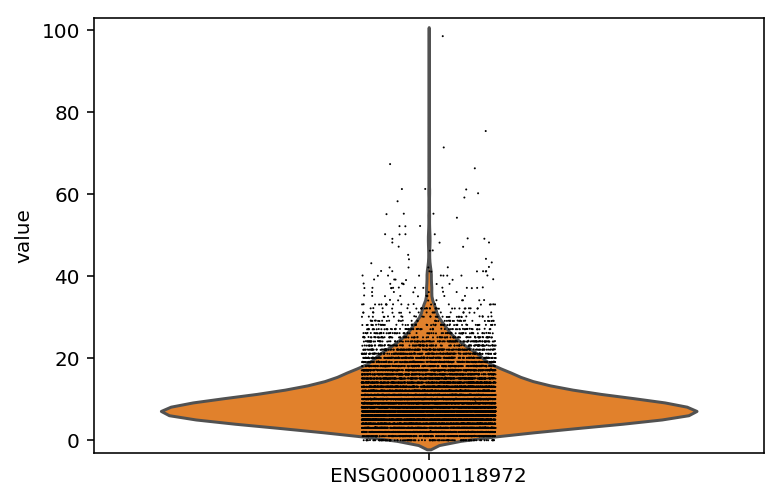

In [31]:
fig, ax = plt.subplots()
ax.set_ylim(-3, 103)
sc.pl.violin(c, keys='ENSG00000118972', color="#1F77B4", dpi=300, save="cellranger_gene.pdf", ax=ax)

fig, ax = plt.subplots()
ax.set_ylim(-3, 103)
sc.pl.violin(k, keys='ENSG00000118972', color="#FF7F0E", dpi=300, save="kallisto_regular_gene.pdf", ax=ax)